<div align="center"><img src="./assets/fcn/封面.png" alt="cover"></div>

<div align="center"><img src="./assets/fcn/目录.png" alt="cover"></div>

<font face="微软雅黑" size=6>**1 FCN网络讲解**</font><br>
<font face="微软雅黑" size=5>**1.1 语义分割介绍**</font><br>
<font face="微软雅黑" size=4>语义分割的目的是对图像中每个像素点进行分类。与普通的分类任务只输出某个类别不同，语义分割任务输出与输入大小相同的图像，输出图像的每个像素对应了输入图像每个像素的类别。语义在图像领域指的是图像的内容，对图片意思的理解，下图是一些语义分割的实例：</font><br>

<div align=center><img src="./assets/fcn/语义分割说明.png"></div>

<font face="微软雅黑" size=2 color="#006666">图片来源于原论文：https://openaccess.thecvf.com/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf</font><br>

<font face="微软雅黑" size=5>**1.2 从CNN到FCN**</font><br>
<font face="微软雅黑" size=4>**CNN的局限**</font><br>
<font face="微软雅黑" size=3>一般用于分类的CNN模型例如VGG-16，结构上一般是卷积层加上全连接层。VGG-16只能接受固定大小的输入。全连接层会将原来二维的特征矩阵压缩成一维的，从而丢失了空间信息。为了客服以上不足，UC Berkeley 的 Jonathan Long 等人于2015年在Fully Convolutional Networks for Semantic Segmentation一文中提出全卷积网络(FCN)并用于图像语义分割。将图像级别的分类扩展到像素级别的分类，并获得 CVPR2015 的 Best paper。大概结构如下图：</font><br>

<div align=center><img src="./assets/fcn/与分类网络的差距.png" width="600"></div>

<font face="微软雅黑" size=2 color="#006666">图片来源于原论文：https://openaccess.thecvf.com/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf</font><br>

<font face="微软雅黑" size=5>**1.2 从CNN到FCN**</font><br>
<font face="微软雅黑" size=4>**转置卷积层**</font><br>
<font face="微软雅黑" size=3>在卷积过程的卷积操作和池化操作会使得特征图的尺寸变小，为得到原图大小的稠密图像预测，需要对卷积操作后得到的特征图进行上采样操作。本文中使用转置卷积来实现上采样的过程。为了便于理解转置卷积，这里暂时先忽略通道的数量。计算过程如下图：
</font><br>
<div align=center><img src="./assets/fcn/转置卷积.png"></div>
<font face="微软雅黑" size=3>其中Kernel的数据为可学习参数，在训练开始的时候需要进行初始化。</font><br>
<font face="微软雅黑" size=2 color="#006666">图片来源：https://blog.csdn.net/chengyq116/article/details/128194758</font><br>

<font face="微软雅黑" size=5>**1.2 从CNN到FCN**</font><br>
<font face="微软雅黑" size=4>**跳跃结构(Skip Layer)**</font><br>
<font face="微软雅黑" size=3>如果仅对最后一层的特征图进行上采样得到原图大小的分割，最终的分割效果并不理想。因为最后一层的特征图经过多层过滤会丢失过多细节信息。因此，通过跳跃结构将最后一层的预测（富有全局信息）和更浅层（富有局部信息）的预测结合起来，这样能同时提高鲁棒性和精确性。跳跃结构如下图所示：</font><br>

<div align=center><img src="./assets/fcn/跳跃结构.png"></div>

<font face="微软雅黑" size=2 color="#006666">图片来源于原论文：https://openaccess.thecvf.com/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf</font><br>

<font face="微软雅黑" size=5>**1.2 从CNN到FCN**</font><br>
<font face="微软雅黑" size=4>**跳跃结构(Skip Layer)**</font><br>
<font face="微软雅黑" size=3>由上图可以看出这里跳跃结构主要分三种，分别为： FCN-32s、 FCN-16s和FCN-8s。原论文作者分别对三个模型做了相同的训练并测试，得出的分割效果如下图所示：</font><br>
<div align=center><img src="./assets/fcn/分割效果对比.png"></div>
<font face="微软雅黑" size=3>由上图结果可知FCN-8s的效果最好，捕捉到了更多的细节信息，分割的也更准确。故后文选择FCN-8s结构。</font>
<font face="微软雅黑" size=2 color="#006666">图片来源于原论文：https://openaccess.thecvf.com/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf</font><br>

<font face="微软雅黑" size=5>**1.3 FCN网络结构**</font><br>
<font face="微软雅黑" size=3>网络结构如下图所示，虚线上半部分为全卷积网络，蓝色方块代表卷积层，绿色方块代表最大池化层。对于不同尺寸的输入图像，各层特征图的大小（height，width）相应变化，深度（channel）不变。这部分由深度学习分类问题中经典网络AlexNet修改而来，把最后两个全连接层改成了卷积层。虚线下半部分为转置卷积和跳跃结构。详细细节见下文代码。</font><br>
<div align=center><img src="./assets/fcn/FCN.png"></div>
<font face="微软雅黑" size=2 color="#006666">图片来源于原论文： https://blog.csdn.net/shenxiaolu1984/article/details/51348149</font><br>

<font face="微软雅黑" size=5>**2 FCN实现图像语义分割**</font><br>

<font face="微软雅黑" size=4>**2.1 数据预处理**</font><br>

<font face="微软雅黑" size=3>使用`download`接口下载数据集，并将下载后的数据集自动解压到当前目录下。数据下载之前需要使用`pip install download`安装`download`包。</font><br>

<font face="微软雅黑" size=3>本文将PASCAL VOC 2012数据集与SDB数据集进行混合。数据经过前处理之后生成了 MindRecord 格式数据，此处省去数据大部分前处理代码。由于PASCAL VOC 2012数据集中图像的分辨率大多不一致，无法放在一个tensor中，故输入前需做标准化处理。</font><br>


In [1]:
import numpy as np
import cv2
import mindspore.dataset as ds
from download import download

# 数据下载
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/dataset_fcn8s.tar"
download(url, "./dataset", kind="tar")


In [2]:
def preprocess_dataset(image, label):
    image_out = cv2.imdecode(np.frombuffer(image, dtype=np.uint8), cv2.IMREAD_COLOR)
    label_out = cv2.imdecode(np.frombuffer(label, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    sc = np.random.uniform(0.5, 2.0)
    new_h, new_w = int(sc * image_out.shape[0]), int(sc * image_out.shape[1])
    image_out = cv2.resize(image_out, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
    label_out = cv2.resize(label_out, (new_w, new_h), interpolation=cv2.INTER_NEAREST)
    image_out = (image_out - np.array(IMAGE_MEAN, dtype=np.float32)) / np.array(IMAGE_STD, dtype=np.float32)
    out_h, out_w = max(new_h, 512), max(new_w, 512)
    pad_h, pad_w = out_h - new_h, out_w - new_w
    if pad_h > 0 or pad_w > 0:
        image_out = cv2.copyMakeBorder(image_out, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=0)
        label_out = cv2.copyMakeBorder(label_out, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=255)
    offset_h = np.random.randint(0, out_h - 512 + 1)
    offset_w = np.random.randint(0, out_w - 512 + 1)
    image_out = image_out[offset_h: offset_h + 512, offset_w: offset_w + 512, :]
    label_out = label_out[offset_h: offset_h + 512, offset_w: offset_w + 512]
    if np.random.uniform(0.0, 1.0) > 0.5:
        image_out = image_out[:, ::-1, :]
        label_out = label_out[:, ::-1]
    image_out = image_out.transpose((2, 0, 1))
    image_out = image_out.copy()
    label_out = label_out.copy()
    label_out = label_out.astype("int32")
    return image_out, label_out


In [3]:
# 定义创建数据集的参数
IMAGE_MEAN = [103.53, 116.28, 123.675]
IMAGE_STD = [57.375, 57.120, 58.395]
data_file = "dataset/mindname.mindrecord"
batch_size = 4

ds.config.set_numa_enable(True)
dataset = ds.MindDataset(data_file, columns_list=["data", "label"],
                         shuffle=True, num_parallel_workers=2)
dataset = dataset.map(operations=preprocess_dataset, input_columns=["data", "label"],
                      output_columns=["data", "label"],
                      num_parallel_workers=4)
dataset = dataset.shuffle(buffer_size=batch_size * 10)
dataset = dataset.batch(batch_size, drop_remainder=True)
print("Datesize: ", dataset.get_dataset_size())

Datesize:  1143


<font face="微软雅黑" size=4>**2.2 模型构建**</font><br>


<font face="微软雅黑" size=3>FCN网络的流程如下：</font><br>

<font face="微软雅黑" size=3>

1. 输入图像image，经过pool1池化后，尺寸变为原始尺寸的1/2；

2. 经过pool2池化，尺寸变为原始尺寸的1/4；

3. 接着经过pool3、pool4、pool5池化，大小分别变为原始尺寸的1/8、1/16、1/32；

4. 经过conv6-7卷积，输出的尺寸依然是原图的1/32；

5. FCN-32s是最后使用反卷积，使得输出图像大小与输入图像相同；

6. FCN-16s是将conv7的输出进行反卷积，使其尺寸扩大两倍至原图的1/16，并将其与pool4输出的特征图进行融合，后通过反卷积扩大到原始尺寸；

7. FCN-8s是将conv7的输出进行反卷积扩大4倍，将pool4输出的特征图反卷积扩大2倍，并将pool3输出特征图拿出，三者融合后通反卷积扩大到原始尺寸。
</font><br>
<font face="微软雅黑" size=3>具体情况见下面代码：</font><br>

In [4]:
import mindspore.nn as nn

# 构建基本卷积层
def make_layer(channels):
    layers = []
    for channels1 in channels:
        layers.append(nn.Conv2d(in_channels=channels1[0], out_channels=channels1[1],
                                kernel_size=channels1[2], weight_init='xavier_uniform'))
        layers.append(nn.BatchNorm2d(channels1[3]))
        layers.append(nn.ReLU())
    return nn.SequentialCell(layers)
def make_layer_conv(a):
    return nn.Conv2d(in_channels=a[0], out_channels=a[1], kernel_size=a[2], weight_init='xavier_uniform')

# 构建转置卷积层
def make_layer_tran_conv(a):
    return nn.Conv2dTranspose(in_channels=a[0], out_channels=a[1], kernel_size=a[2], stride=a[3],
                              weight_init='xavier_uniform')


In [5]:
class FCN8s(nn.Cell):
    def __init__(self, n_class):
        super().__init__()
        self.n_class = n_class
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv1 = make_layer([[3, 64, 3, 64], [64, 64, 3, 64]])
        self.conv2 = make_layer([[64, 128, 3, 128], [128, 128, 3, 128]])
        self.conv3 = make_layer([[128, 256, 3, 256], [256, 256, 3, 256], [256, 256, 3, 256]])
        self.conv4 = make_layer([[256, 512, 3, 512], [512, 512, 3, 512], [512, 512, 3, 512]])
        self.conv5 = make_layer([[512, 512, 3, 512], [512, 512, 3, 512], [512, 512, 3, 512]])
        self.conv6 = make_layer([[512, 4096, 7, 4096]])
        self.conv7 = make_layer([[4096, 4096, 1, 4096]])
        self.score_fr = make_layer_conv([4096, self.n_class, 1])
        self.upscore2 = make_layer_tran_conv([self.n_class, self.n_class, 4, 2])
        self.score_pool4 = make_layer_conv([512, self.n_class, 1])
        self.upscore_pool4 = make_layer_tran_conv([self.n_class, self.n_class, 4, 2])
        self.score_pool3 = make_layer_conv([256, self.n_class, 1])
        self.upscore8 = make_layer_tran_conv([self.n_class, self.n_class, 16, 8])

    def construct(self, x):
        p3 = self.pool(self.conv3(self.pool(self.conv2(self.pool(self.conv1(x))))))
        p4 = self.pool(self.conv4(p3))
        u2 = self.upscore2(self.score_fr(self.conv7(self.conv6(self.pool(self.conv5(p4))))))
        s4 = self.score_pool4(p4)
        f4 = s4 + u2
        u4 = self.upscore_pool4(f4)
        s3 = self.score_pool3(p3)
        f3 = s3 + u4
        out = self.upscore8(f3)
        return out

<font face="微软雅黑" size=4>**2.3 自定义评价指标**</font><br>
<font face="微软雅黑" size=3>
这一部分主要对训练出来的模型效果进行评估，为了便于解释，假设如下：共有 $k+1$ 个类（从 $L_0$ 到 $L_k$, 其中包含一个空类或背景）， $p_{i j}$ 表示本属于$i$类但被预测为$j$类的像素数量。即, $p_{i i}$ 表示真正的数量, 而 $p_{i j} p_{j i}$ 则分别被解释为假正和假负, 尽管两者都是假正与假负之和。</font><br>

<font face="微软雅黑" size=3>

- Pixel Accuracy(PA, 像素精度)：这是最简单的度量，为标记正确的像素占总像素的比例。
$$ P A=\frac{\sum_{i=0}^k p_{i i}}{\sum_{i=0}^k \sum_{j=0}^k p_{i j}} $$
- Mean Pixel Accuracy(MPA, 均像素精度)：是PA的一种简单提升，计算每个类内被正确分类像素数的比例，之后求所有类的平均。
$$ M P A=\frac{1}{k+1} \sum_{i=0}^k \frac{p_{i i}}{\sum_{j=0}^k p_{i j}} $$
- Mean Intersection over Union(MloU, 均交并比)：为语义分割的标准度量。其计算两个集合的交集和并集之，在语义分割的问题中，这两个集合为真实值（ground truth) 和预测值（predicted segmentation）。这个比例可以变形为正真数 (intersection) 比上真正、假负、假正（并集）之和。在每个类上计算loU，之后平均。
$$ M I o U=\frac{1}{k+1} \sum_{i=0}^k \frac{p_{i i}}{\sum_{j=0}^k p_{i j}+\sum_{j=0}^k p_{j i}-p_{i i}} $$
- Frequency Weighted Intersection over Union(FWIoU, 频权交井比)：为MloU的一种提升，这种方法根据每个类出现的频率为其设置权重。
$$ F W I o U=\frac{1}{\sum_{i=0}^k \sum_{j=0}^k p_{i j}} \sum_{i=0}^k \frac{p_{i i}}{\sum_{j=0}^k p_{i j}+\sum_{j=0}^k p_{j i}-p_{i i}}$$

</font><br>

In [6]:
import numpy as np
import mindspore as ms
import mindspore.train as train

# PA, 像素精度
class PixelAccuracy(train.Metric):
    def __init__(self, num_class=21):
        super(PixelAccuracy, self).__init__()
        self.num_class = num_class

    def _generate_matrix(self, gt_image, pre_image):
        mask = (gt_image >= 0) & (gt_image < self.num_class)
        label = self.num_class * gt_image[mask].astype('int') + pre_image[mask]
        count = np.bincount(label, minlength=self.num_class**2)
        confusion_matrix = count.reshape(self.num_class, self.num_class)
        return confusion_matrix

    def clear(self):
        self.confusion_matrix = np.zeros((self.num_class,) * 2)

    def update(self, *inputs):
        y_pred = inputs[0].asnumpy().argmax(axis=1)
        y = inputs[1].asnumpy().reshape(4, 512, 512)
        self.confusion_matrix += self._generate_matrix(y, y_pred)

    def eval(self):
        pixel_accuracy = np.diag(self.confusion_matrix).sum() / self.confusion_matrix.sum()
        return pixel_accuracy

In [7]:
# MPA, 均像素精度
class PixelAccuracyClass(PixelAccuracy):
    def __init__(self, num_class=21):
        super(PixelAccuracyClass, self).__init__()
        self.num_class = num_class

    def eval(self):
        mean_pixel_accuracy = np.diag(self.confusion_matrix) / self.confusion_matrix.sum(axis=1)
        mean_pixel_accuracy = np.nanmean(mean_pixel_accuracy)
        return mean_pixel_accuracy

# MloU, 均交并比
class MeanIntersectionOverUnion(PixelAccuracy):
    def __init__(self, num_class=21):
        super(MeanIntersectionOverUnion, self).__init__()
        self.num_class = num_class

    def eval(self):
        mean_iou = np.diag(self.confusion_matrix) / (
                np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                np.diag(self.confusion_matrix))
        mean_iou = np.nanmean(mean_iou)
        return mean_iou

In [8]:
# FWIoU, 频权交井比
class FrequencyWeightedIntersectionOverUnion(PixelAccuracy):
    def __init__(self, num_class=21):
        super(FrequencyWeightedIntersectionOverUnion, self).__init__()
        self.num_class = num_class

    def eval(self):
        freq = np.sum(self.confusion_matrix, axis=1) / np.sum(self.confusion_matrix)
        iu = np.diag(self.confusion_matrix) / (
                np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                np.diag(self.confusion_matrix))

        frequency_weighted_iou = (freq[freq > 0] * iu[freq > 0]).sum()
        return frequency_weighted_iou
    
# 加载与训练权重
def load_vgg16():
    ckpt_vgg16 = "fcn8s_vgg16_pretrain.ckpt"
    param_vgg = load_checkpoint(ckpt_vgg16)
    load_param_into_net(net, param_vgg)

<font face="微软雅黑" size=4>**2.4 模型训练、评估和推理**</font><br>

<font face="微软雅黑" size=3>导入VGG-16预训练参数后，实例化损失函数、优化器，使用Model接口编译网络，训练FCN-8s网络。然后加载模型的权重使用之前的评价指标对数据进行评估和推理，并对模型推理结果进行展示。</font><br>

In [9]:
import mindspore
from mindspore import Tensor
from mindspore import load_checkpoint, load_param_into_net
import mindspore.nn as nn
from mindspore.train import ModelCheckpoint, CheckpointConfig, LossMonitor, TimeMonitor, Model

device_target = "CPU"
mindspore.set_context(mode=mindspore.PYNATIVE_MODE, device_target=device_target)

num_classes = 21
# 初始化模型结构
net = FCN8s(n_class=num_classes)
# 导入vgg16预训练参数
load_vgg16()
# 计算学习率
min_lr, base_lr, train_epochs = 0.0005, 0.05, 1
iters_per_epoch = dataset.get_dataset_size()
total_step = iters_per_epoch * train_epochs
lr_scheduler = mindspore.nn.cosine_decay_lr(min_lr, base_lr, total_step, iters_per_epoch, decay_epoch=2)
lr = Tensor(lr_scheduler[-1])

In [10]:
# 定义损失函数
loss = nn.CrossEntropyLoss(ignore_index=255)
# 定义优化器
optimizer = nn.Momentum(params=net.trainable_params(), learning_rate=lr, momentum=0.9, weight_decay=0.0001)
# 定义loss_scale
scale_factor, scale_window = 4, 3000
loss_scale_manager = ms.amp.DynamicLossScaleManager(scale_factor, scale_window)
# 初始化模型
if device_target == "Ascend":
    model = Model(net, loss_fn=loss, optimizer=optimizer, loss_scale_manager=loss_scale_manager)
else:
    model = Model(net, loss_fn=loss, optimizer=optimizer)
# 设置ckpt文件保存的参数
time_callback = TimeMonitor(data_size=iters_per_epoch)
loss_callback = LossMonitor()
callbacks = [time_callback, loss_callback]
save_steps, keep_checkpoint_max = 330, 5
config_ckpt = CheckpointConfig(save_checkpoint_steps=10, keep_checkpoint_max=keep_checkpoint_max)
ckpt_callback = ModelCheckpoint(prefix="FCN8s", directory="./ckpt", config=config_ckpt)
callbacks.append(ckpt_callback)
# 模型训练
model.train(train_epochs, dataset, callbacks=callbacks)

epoch: 1 step: 1, loss is 3.0904884338378906
epoch: 1 step: 2, loss is 3.0506458282470703
epoch: 1 step: 3, loss is 2.9796371459960938
...


In [11]:
# 下载已训练好的权重文件
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/FCN8s.ckpt"
download(url, "FCN8s.ckpt")

ckpt_file = "FCN8s.ckpt"
param_dict = load_checkpoint(ckpt_file)
load_param_into_net(net, param_dict)

if device_target == "Ascend":
    model = Model(net, loss_fn=loss, optimizer=optimizer, loss_scale_manager=loss_scale_manager,
                  metrics={"pixel accuracy": PixelAccuracy(), "mean pixel accuracy": PixelAccuracyClass(),
                           "mean IoU": MeanIntersectionOverUnion(),
                           "frequency weighted IoU": FrequencyWeightedIntersectionOverUnion()})
else:
    model = Model(net, loss_fn=loss, optimizer=optimizer,
                  metrics={"pixel accuracy": PixelAccuracy(), "mean pixel accuracy": PixelAccuracyClass(),
                           "mean IoU": MeanIntersectionOverUnion(),
                           "frequency weighted IoU": FrequencyWeightedIntersectionOverUnion()})
# 模型评估
model.eval(dataset)

{'pixel accuracy': 0.9730794492338827,
 'mean pixel accuracy': 0.9404773259113549,
 'mean IoU': 0.8942099596003479,
 'frequency weighted IoU': 0.9481028114886334}

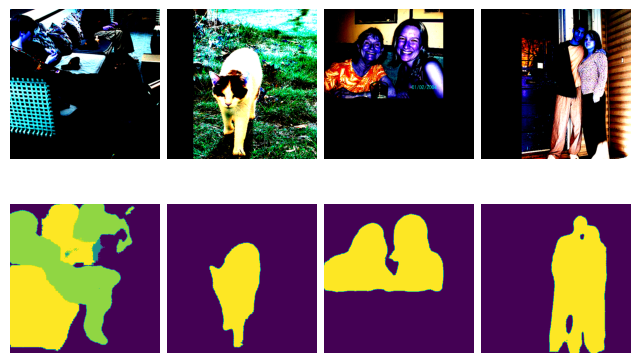

In [12]:
import cv2
import matplotlib.pyplot as plt

## 模型推理
eval_batch_size = 4
img_lst, mask_lst, res_lst = [], [], []
# 推理效果展示(上方为输入图片，下方为推理效果图片)
plt.figure(figsize=(8, 5))
show_data = next(dataset.create_dict_iterator())
show_images = show_data["data"].asnumpy()
mask_images = show_data["label"].reshape([4, 512, 512])
show_images = np.clip(show_images, 0, 1)
for i in range(eval_batch_size):
    img_lst.append(show_images[i])
    mask_lst.append(mask_images[i])
res = net(show_data["data"]).asnumpy().argmax(axis=1)
for i in range(eval_batch_size):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img_lst[i].transpose(1, 2, 0))
    plt.axis("off")
    plt.subplots_adjust(wspace=0.05, hspace=0.02)
    plt.subplot(2, 4, i + 5)
    plt.imshow(res[i])
    plt.axis("off")
    plt.subplots_adjust(wspace=0.05, hspace=0.02)
plt.show()
